In [1]:
import pandas as pd
import numpy as np

import spacy

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from functools import reduce

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
real = pd.read_csv('True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.shape , real.shape

((23481, 4), (21417, 4))

In [5]:
fake.shape[0] / 2

11740.5

In [6]:
rand_fake = np.random.randint(0, 23481, size=11741)
rand_real = np.random.randint(0, 21417, size=11741)

In [7]:
fake_sample = fake.iloc[rand_fake]
real_sample = real.iloc[rand_real]

In [8]:
fake_sample.head()

,title,text,subject,date
14595,OBAMA FEAR MONGERING: Republican Party Becomin...,Leave it to Obama to take to fear mongering to...,politics,"Jan 25, 2016"
8434,‘Christians’ Who Leave Fake $20 Tips For Serv...,Christian fundamentalists picked on the wrong ...,News,"January 30, 2016"
16267,RADICAL ERIC HOLDER STIRS THE POT…Claims Repub...,,Government News,"Jan 12, 2017"
3719,Bernie Just Uncovered A HUGE ‘Scam’ Trump Tho...,One of Donald Trump s biggest ideas and a way ...,News,"November 21, 2016"
13815,GREAT NEWS! Thanks To New York’s Socialist May...,The social rot continues in a city that was mi...,politics,"May 27, 2016"


In [9]:
fake_sample['type'] = 1
real_sample['type'] = 0

<ipython-input-9-d1371d63e2fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_sample['type'] = 1
<ipython-input-9-d1371d63e2fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_sample['type'] = 0


In [10]:
df_sample = pd.concat([fake_sample, real_sample], axis =0)
df_sample.head()

,title,text,subject,date,type
14595,OBAMA FEAR MONGERING: Republican Party Becomin...,Leave it to Obama to take to fear mongering to...,politics,"Jan 25, 2016",1
8434,‘Christians’ Who Leave Fake $20 Tips For Serv...,Christian fundamentalists picked on the wrong ...,News,"January 30, 2016",1
16267,RADICAL ERIC HOLDER STIRS THE POT…Claims Repub...,,Government News,"Jan 12, 2017",1
3719,Bernie Just Uncovered A HUGE ‘Scam’ Trump Tho...,One of Donald Trump s biggest ideas and a way ...,News,"November 21, 2016",1
13815,GREAT NEWS! Thanks To New York’s Socialist May...,The social rot continues in a city that was mi...,politics,"May 27, 2016",1


In [11]:
df_sample.reset_index(inplace=True)

In [12]:
df_sample.head()

,index,title,text,subject,date,type
0,14595,OBAMA FEAR MONGERING: Republican Party Becomin...,Leave it to Obama to take to fear mongering to...,politics,"Jan 25, 2016",1
1,8434,‘Christians’ Who Leave Fake $20 Tips For Serv...,Christian fundamentalists picked on the wrong ...,News,"January 30, 2016",1
2,16267,RADICAL ERIC HOLDER STIRS THE POT…Claims Repub...,,Government News,"Jan 12, 2017",1
3,3719,Bernie Just Uncovered A HUGE ‘Scam’ Trump Tho...,One of Donald Trump s biggest ideas and a way ...,News,"November 21, 2016",1
4,13815,GREAT NEWS! Thanks To New York’s Socialist May...,The social rot continues in a city that was mi...,politics,"May 27, 2016",1


In [13]:
df_sample.drop(['title', 'subject', 'date', 'index'], axis=1, inplace=True)

In [14]:
df_sample.head()

,text,type
0,Leave it to Obama to take to fear mongering to...,1
1,Christian fundamentalists picked on the wrong ...,1
2,,1
3,One of Donald Trump s biggest ideas and a way ...,1
4,The social rot continues in a city that was mi...,1


In [15]:
df_sample.shape

(23482, 2)

In [16]:
def remove_special_char(x):
    wo_punct = re.sub('[^a-zA-Z]',' ', x)
    return wo_punct

In [17]:
df_sample['text'] = df_sample['text'].apply(remove_special_char)

In [18]:
df_sample.head()

,text,type
0,Leave it to Obama to take to fear mongering to...,1
1,Christian fundamentalists picked on the wrong ...,1
2,,1
3,One of Donald Trump s biggest ideas and a way ...,1
4,The social rot continues in a city that was mi...,1


In [19]:
def remove_stopwords(x):
    tokenize = word_tokenize(x.lower())
    wo_stopwords = [word for word in tokenize if not word in stopwords.words()]
    print('finished with eliminating stopwords')
    return wo_stopwords

In [20]:
df_sample['text'] = df_sample['text'].apply(remove_stopwords)

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

In [21]:
df_sample.to_csv('df_sample_wo_stopwords.csv', sep=',', index_label=False)

In [22]:
df_sample.head()

,text,type
0,"[leave, obama, fear, mongering, try, convince,...",1
1,"[christian, fundamentalists, picked, wrong, re...",1
2,[],1
3,"[donald, trump, biggest, ideas, way, hopes, pe...",1
4,"[social, rot, continues, city, miraculously, c...",1


In [23]:
def lemmatization(x):
    try: 
        lemmatizer=WordNetLemmatizer() # instanciar word net lemmatizer
        root_words = [lemmatizer.lemmatize(word) for word in x]
        print('finished with lemmatization')
        return reduce(lambda x, y: x + ' ' + y, root_words)
    except:
        print('hubo un error')

In [24]:
df_sample['text'] = df_sample['text'].apply(lemmatization)

finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmat

In [25]:
df_sample.head()

,text,type
0,leave obama fear mongering try convince voter ...,1
1,christian fundamentalist picked wrong restaura...,1
2,None,1
3,donald trump biggest idea way hope peel suppor...,1
4,social rot continues city miraculously cleaned...,1


In [26]:
df_sample.to_csv('df_sample_lemmatized.csv', sep=',', index_label=False)

In [27]:
df_sample.head()

,text,type
0,leave obama fear mongering try convince voter ...,1
1,christian fundamentalist picked wrong restaura...,1
2,None,1
3,donald trump biggest idea way hope peel suppor...,1
4,social rot continues city miraculously cleaned...,1


In [29]:
df_sample.isna().sum()

text    317
type      0
dtype: int64

In [30]:
df_sample.dropna(inplace=True)

In [31]:
df_sample.head()

,text,type
0,leave obama fear mongering try convince voter ...,1
1,christian fundamentalist picked wrong restaura...,1
3,donald trump biggest idea way hope peel suppor...,1
4,social rot continues city miraculously cleaned...,1
6,year later donald trump supporter happier choi...,1


In [32]:
df_sample.reset_index(inplace=True)

In [33]:
df_sample.drop('index', axis=1, inplace=True)

In [34]:
df_sample.head()

,text,type
0,leave obama fear mongering try convince voter ...,1
1,christian fundamentalist picked wrong restaura...,1
2,donald trump biggest idea way hope peel suppor...,1
3,social rot continues city miraculously cleaned...,1
4,year later donald trump supporter happier choi...,1


In [35]:
X = df_sample['text']
y = df_sample['type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [37]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [38]:
model1 = PassiveAggressiveClassifier(max_iter=300)
model1.fit(X_train,y_train)
model2 = GaussianNB()
model2.fit(X_train.toarray(),y_train)
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
model5 = SVC()
model5.fit(X_train,y_train)
model6 = LogisticRegression()
model6.fit(X_train,y_train)

LogisticRegression()

In [76]:
import joblib

In [77]:
filename1 = 'finalized_model_pac.sav'
joblib.dump(model1, filename1)

['finalized_model_pac.sav']

In [78]:
filename2 = 'finalized_model_gnb.sav'
joblib.dump(model2, filename2)

['finalized_model_gnb.sav']

In [79]:
filename3 = 'finalized_model_decisiontree.sav'
joblib.dump(model3, filename3)

['finalized_model_decisiontree.sav']

In [80]:
filename4 = 'finalized_model_randomtree.sav'
joblib.dump(model4, filename4)

['finalized_model_randomtree.sav']

In [81]:
filename5 = 'finalized_model_svc.sav'
joblib.dump(model5, filename5)

['finalized_model_svc.sav']

In [82]:
filename6 = 'finalized_model_logreg.sav'
joblib.dump(model6, filename6)

['finalized_model_logreg.sav']

In [39]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test.toarray())
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)

In [40]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

labels={'PassiveAggressiveClassifier':acc1, 
        'GaussianNB':acc2, 
        'DecisionTreeClassifier':acc3, 
        'RandomForestClassifier':acc4,
        'SVC':acc5, 
        'LogisticRegression':acc6}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 0.9911504424778761
GaussianNB : 0.8974746384631987
DecisionTreeClassifier : 0.9971940427368875
RandomForestClassifier : 0.9889920138139434
SVC : 0.9898553852795166
LogisticRegression : 0.9835959421541118


In [43]:
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)
cm4 = confusion_matrix(y_test,y_pred4)
cm5 = confusion_matrix(y_test,y_pred5)
cm6 = confusion_matrix(y_test,y_pred6)

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

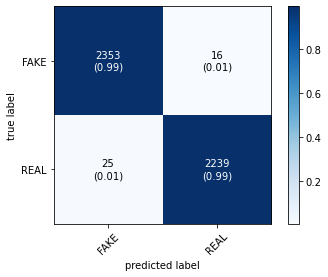

In [44]:
cm1 
print('Confusion Matrix for PassiveAggressiveClassifier')
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for GaussianNB


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

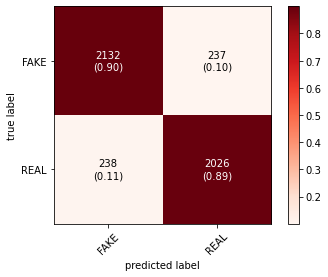

In [143]:
print('Confusion Matrix for GaussianNB')
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap='Reds')

Confusion Matrix for DecisionTreeClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

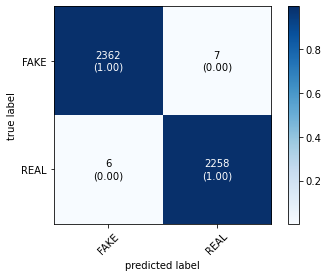

In [46]:
print('Confusion Matrix for DecisionTreeClassifier')
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for RandomForestClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

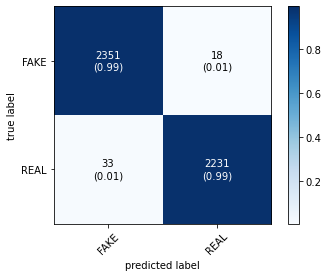

In [47]:
print('Confusion Matrix for RandomForestClassifier')
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for SVC


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

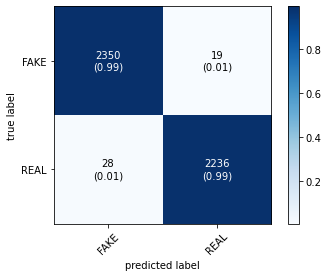

In [48]:
print('Confusion Matrix for SVC')
plot_confusion_matrix(conf_mat=cm5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for LogisticRegression


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

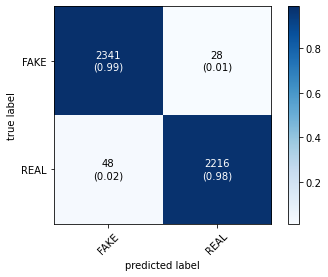

In [49]:
print('Confusion Matrix for LogisticRegression')
plot_confusion_matrix(conf_mat=cm6,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [50]:
rand_fake_1 = np.random.randint(0, 23481, size=50)
rand_real_1 = np.random.randint(0, 21417, size=50)

In [51]:
fake_samp = fake.iloc[rand_fake_1]
real_samp = real.iloc[rand_real_1]

In [54]:
fake_samp['type'] = 1
real_samp['type'] = 0

<ipython-input-54-eaf86532dcf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_samp['type'] = 1
<ipython-input-54-eaf86532dcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_samp['type'] = 0


In [55]:
df_samp = pd.concat([fake_samp, real_samp], axis =0)
df_samp.head()

,title,text,subject,date,type
12141,MICHIGAN ELECTOR Receives Violent Death Threat...,,politics,"Dec 14, 2016",1
8019,YMCA Camp Forces Black Children Through Slave...,"A YMCA camp in Jackson, Michigan forced ten-ye...",News,"February 18, 2016",1
4575,Campaign Over: Gary Johnson Glad ‘Nobody Got ...,Gay Johnson appeared on CNN s Reliable Sources...,News,"September 18, 2016",1
11218,WATCH: HILARIOUS Video Proves CNN Doesn’t Even...,Watch these hilarious examples of CNN having r...,politics,"Apr 3, 2017",1
13751,HEY BERNIE SANDERS! There’s No Such Thing As E...,Bernie Sanders likes to talk about how everyon...,politics,"Jun 5, 2016",1


In [56]:
df_samp.reset_index(inplace=True)

In [57]:
df_samp.drop(['title', 'subject', 'date', 'index'], axis=1, inplace=True)

In [58]:
df_samp.head()

,text,type
0,,1
1,"A YMCA camp in Jackson, Michigan forced ten-ye...",1
2,Gay Johnson appeared on CNN s Reliable Sources...,1
3,Watch these hilarious examples of CNN having r...,1
4,Bernie Sanders likes to talk about how everyon...,1


In [59]:
df_samp['text'] = df_samp['text'].apply(remove_special_char)

In [60]:
df_samp['text'] = df_samp['text'].apply(remove_stopwords)

finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating stopwords
finished with eliminating st

In [61]:
df_samp['text'] = df_samp['text'].apply(lemmatization)

finished with lemmatization
hubo un error
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finished with lemmatization
finish

In [62]:
df_samp.isna().sum()

text    1
type    0
dtype: int64

In [63]:
df_samp.dropna(inplace=True)

In [65]:
df_samp.reset_index(inplace=True)

In [66]:
df_samp.drop('index', axis=1, inplace=True)

In [67]:
df_samp.head()

,text,type
0,ymca camp jackson michigan forced ten year old...,1
1,gay johnson appeared cnn reliable source sunda...,1
2,watch hilarious example cnn reckless disregard...,1
3,bernie sander like talk everyone equal using p...,1
4,muslim faith must protected cost obama way new...,1


In [68]:
X_test_1 = df_samp['text']

In [72]:
y_test_1 = df_samp['type']

In [69]:
X_test_1 = tfidf.transform(X_test_1)

In [70]:
y_pred11 = model1.predict(X_test_1)
y_pred12 = model2.predict(X_test_1.toarray())
y_pred13 = model3.predict(X_test_1)
y_pred14 = model4.predict(X_test_1)
y_pred15 = model5.predict(X_test_1)
y_pred16 = model6.predict(X_test_1)

In [73]:
acc11 = accuracy_score(y_test_1,y_pred11)
acc12 = accuracy_score(y_test_1,y_pred12)
acc13 = accuracy_score(y_test_1,y_pred13)
acc14 = accuracy_score(y_test_1,y_pred14)
acc15 = accuracy_score(y_test_1,y_pred15)
acc16 = accuracy_score(y_test_1,y_pred16)

labels={'PassiveAggressiveClassifier':acc11, 
        'GaussianNB':acc12, 
        'DecisionTreeClassifier':acc13, 
        'RandomForestClassifier':acc14,
        'SVC':acc15, 
        'LogisticRegression':acc16}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 1.0
GaussianNB : 0.9494949494949495
DecisionTreeClassifier : 1.0
RandomForestClassifier : 0.98989898989899
SVC : 0.98989898989899
LogisticRegression : 0.98989898989899


In [74]:
cm11 = confusion_matrix(y_test_1,y_pred11)
cm12 = confusion_matrix(y_test_1,y_pred12)
cm13 = confusion_matrix(y_test_1,y_pred13)
cm14 = confusion_matrix(y_test_1,y_pred14)
cm15 = confusion_matrix(y_test_1,y_pred15)
cm16 = confusion_matrix(y_test_1,y_pred16)

Confusion Matrix for GaussianNB


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

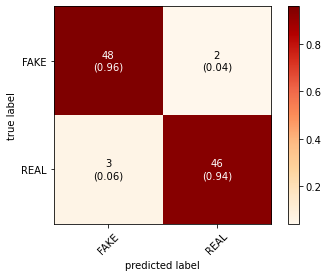

In [136]:
print('Confusion Matrix for GaussianNB')
#fig, ax=plt.subplots()
plot_confusion_matrix(conf_mat=cm12,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'],cmap='OrRd')

In [ ]:
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [118]:
text_fake = """ROME – A Vatican spokesman confirmed media reports Saturday  that an official living at the same residence as Pope Francis has tested positive for the COVID-19 coronavirus, insisting that the pope himself and those close to him do not have the disease.

In a March 28 statement, spokesman Matteo Bruni said the person in question “is an official from the Secretariat of State who resides at Santa Marta and who, presenting some symptoms, was subsequently placed in isolation.”

Bruni said the positive test was the result of routine checks the Vatican’s Health and Hygiene Department had been carrying out on employees and officials of the Vatican, several of whom live at the Vatican’s Saint Martha guesthouse, where Pope Francis also resides.

According to the statement, the official, whom Bruni did not identify, does not have “particularly critical” symptoms, but as a precaution was admitted to a hospital in Rome under observation and is in close contact with the Vatican’s health department.

Following the positive test, the official’s apartment and work space were sanitized, and Vatican health personnel have reached out to those with whom the official had been in contact in the days leading up to his diagnosis.

In carrying out tests, Bruni said one further positive case was identified among employees of the Holy See who had close contact with the official, but no one else at the Saint Martha house has tested positive.

“I can confirm that neither the Holy Father nor his closest collaborators are involved,” Bruni said, explaining that as a precaution, given the second positive test, the Vatican’s health department has taken appropriate sanitation measures and has performed around 170 tests in total of officials and employees of the Vatican, including those living at the Santa Marta house.

These tests “have all resulted negative,” Bruni said, noting that currently there are six people in the Vatican who have tested positive for the coronavirus.

Confirmed on March 6, the first case was a priest who during a routine exam at the Vatican’s health clinic tested positive, prompting the closing and sanitation of the clinic.

Bruni’s statement Saturday was accompanied by a caution to journalists to respect “the ethical rules of journalism,” particularly those regarding maintaining the privacy of the identity of those who have tested positive for COVID-19, “particularly when they do not hold institutional roles.”"""

In [119]:
text_real = """Life expectancy in the U.S. dropped by almost two years last year amid the COVID-19 pandemic, representing the biggest single-year decline in more than 75 years, according to finalized statistics from the Centers for Disease Control and Prevention.

Mortality data released by the National Center for Health Statistics calculated the life expectancy in 2020 at 77 years — a 1.8-year decrease from 2019.

COVID-19 ranked as the third leading cause of death with more than 350,000 fatalities, behind heart disease and cancer deaths, which both surpassed 600,000.

Life expectancy among men fell 2.1 years to 74.2 years last year, while life expectancy among women dipped 1.5 years to 79.9. 

For the first time in 2020, diabetes deaths surpassed 100,000 and accidental injury fatalities reached beyond 200,000. 

Overall, the age-adjusted death rate for the whole population increased by 16.8 percent to 835.4 deaths per 100,000 people last year. 

Every age group over 15 years old and every race-ethnicity-sex group saw its death rate increase. Hispanic men and women saw the greatest surges in death rates at 42.7 percent and 32.4 percent, respectively. Black men and women followed with 28 percent and almost 25 percent rises, respectively, compared with white men and women, who saw 13.4 percent and 12.1 percent increases, respectively.

Nine of the 10 leading causes of death last year stayed consistent with 2019, with COVID-19 added to the list and suicide falling from the top 10. 

But infant mortality fell 2.9 percent last year to a record low of 541.9 infant deaths per 100,000 live births.

Early this year, preliminary data from the first six months of 2020 released showed that life expectancy decreased by one year, with high drops among Black Americans and Hispanic Americans. Estimates from July for the entire year predicted a 1.5-year drop in life expectancy from 2019.  

A BMJ study published last month found the U.S. endured the second-largest drop in life expectancy among wealthy countries during the pandemic. 

Throughout the pandemic, the U.S. has recorded more than 51 million COVID-19 cases and almost 810,000 deaths, according to data from Johns Hopkins University."""

In [120]:
text_news = {'text': [text_fake, text_real],
            'type': [1, 0]}

In [121]:
data_samp = pd.DataFrame(text_news)
data_samp.head()

,text,type
0,ROME – A Vatican spokesman confirmed media rep...,1
1,Life expectancy in the U.S. dropped by almost ...,0


In [109]:
text_fake_spchar = remove_special_char(text_fake)
text_fake_spchar

'The Health Minister Obadiah Moyo was contacted by Zimbaeye at  pm on the matter but would not comment further   A report alleges that Wilkins Infectious Diseases Hospital in Harare has admitted a visitor who recently travelled to China with symptoms of the deadly coronavirus  COVID      The hospital was under virtual lockdown from around  pm with armed guards controlling movement of people  Sources said the hospital has since transfered all its patients to Beatrice Road Infectious Diseases Hospital also in the capital    An emergency meeting has been called and the Government is soon expected to make an announcement    a source at the Ministry of Health said   The Health Minister Obadiah Moyo was contacted by ZimEye at  pm on the matter but would not   Related Story  No cases of coronavirus  the virus that originated from China and is spreading across the world  have been reported in Zimbabwe  but the Chinese embassy to the southern African nation has urged Zimbabweans who have return

In [110]:
text_fake_stopwords = remove_stopwords(text_fake_spchar)
text_fake_stopwords

finished with eliminating stopwords


['health',
 'minister',
 'obadiah',
 'moyo',
 'contacted',
 'zimbaeye',
 'pm',
 'matter',
 'would',
 'comment',
 'report',
 'alleges',
 'wilkins',
 'infectious',
 'diseases',
 'hospital',
 'harare',
 'admitted',
 'visitor',
 'recently',
 'travelled',
 'china',
 'symptoms',
 'deadly',
 'coronavirus',
 'covid',
 'hospital',
 'virtual',
 'lockdown',
 'around',
 'pm',
 'armed',
 'guards',
 'controlling',
 'movement',
 'people',
 'sources',
 'said',
 'hospital',
 'since',
 'transfered',
 'patients',
 'beatrice',
 'road',
 'infectious',
 'diseases',
 'hospital',
 'capital',
 'emergency',
 'meeting',
 'called',
 'government',
 'soon',
 'expected',
 'make',
 'announcement',
 'source',
 'ministry',
 'health',
 'said',
 'health',
 'minister',
 'obadiah',
 'moyo',
 'contacted',
 'zimeye',
 'pm',
 'matter',
 'would',
 'related',
 'story',
 'cases',
 'coronavirus',
 'virus',
 'originated',
 'china',
 'spreading',
 'across',
 'world',
 'reported',
 'zimbabwe',
 'chinese',
 'embassy',
 'southern',
 '

In [87]:
text_fake_lem = lemmatization(text_fake_stopwords)

finished with lemmatization


In [88]:
X_sample = text_fake_lem
y_sample = 1

In [90]:
X_sample_1 = tfidf.transform(X_sample)

ValueError: Iterable over raw text documents expected, string object received.

In [122]:
data_samp['text'] = data_samp['text'].apply(remove_special_char)

In [123]:
data_samp['text'] = data_samp['text'].apply(remove_stopwords)

finished with eliminating stopwords
finished with eliminating stopwords


In [124]:
data_samp['text'] = data_samp['text'].apply(lemmatization)

finished with lemmatization
finished with lemmatization


In [125]:
X_sample = data_samp['text']
y_sample = data_samp['type']

In [126]:
X_sample = tfidf.transform(X_sample)

In [127]:
y_pred_samp = model2.predict(X_sample.toarray())
y_pred_samp

array([1, 0], dtype=int64)

In [117]:
acc_sample = accuracy_score(y_sample, y_pred_samp)

labels={
#    'PassiveAggressiveClassifier':acc11, 
        'GaussianNB':acc_sample 
#        'DecisionTreeClassifier':acc13, 
#        'RandomForestClassifier':acc14,
#        'SVC':acc15, 
#        'LogisticRegression':acc16
        }
    
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

GaussianNB : 0.5


In [104]:
cm_samp = confusion_matrix(y_sample,y_pred_samp)

Confusion Matrix for GaussianNB


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

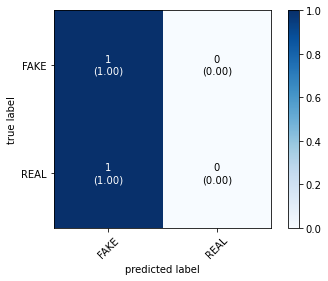

In [105]:
print('Confusion Matrix for GaussianNB')
plot_confusion_matrix(conf_mat=cm_samp,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [ ]:
#https://thehill.com/policy/healthcare/586844-life-expectancy-fell-almost-2-years-in-2020-cdc True
#https://mcmnt.com/vatican-confirms-pope-francis-and-two-aides-test-positive-for-coronavirus/